In [624]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [625]:
df = pd.read_json('data/final_dataset.json')
df.reset_index(inplace=True)
df.drop(['index'], axis=1, inplace=True)
df.head(10)

,Url,BathroomCount,BedroomCount,ConstructionYear,Country,District,Fireplace,FloodingZone,Furnished,Garden,...,RoomCount,ShowerCount,StateOfBuilding,SubtypeOfProperty,SurfaceOfPlot,SwimmingPool,Terrace,ToiletCount,TypeOfProperty,TypeOfSale
0,https://www.immoweb.be/en/classified/apartment...,1.0,1,1969.0,Belgium,Brugge,NaN,None,NaN,NaN,...,1.0,0.0,GOOD,flat_studio,NaN,NaN,1.0,1.0,2,residential_sale
1,https://www.immoweb.be/en/classified/house/for...,6.0,13,1920.0,Belgium,Tournai,NaN,None,0.0,NaN,...,31.0,NaN,GOOD,apartment_block,130.0,NaN,NaN,5.0,1,residential_sale
2,https://www.immoweb.be/en/classified/house/for...,2.0,4,2008.0,Belgium,Brugge,NaN,NON_FLOOD_ZONE,1.0,NaN,...,NaN,0.0,GOOD,house,0.0,NaN,NaN,2.0,1,residential_sale
3,https://www.immoweb.be/en/classified/house/for...,1.0,4,NaN,Belgium,Veurne,NaN,None,NaN,1.0,...,NaN,NaN,TO_BE_DONE_UP,house,170.0,0.0,1.0,2.0,1,residential_sale
4,https://www.immoweb.be/en/classified/apartment...,0.0,2,1972.0,Belgium,Hasselt,NaN,NON_FLOOD_ZONE,NaN,NaN,...,1.0,0.0,AS_NEW,apartment,NaN,NaN,1.0,1.0,2,residential_sale
5,https://www.immoweb.be/en/classified/apartment...,1.0,1,1994.0,Belgium,Brussels,NaN,None,1.0,NaN,...,NaN,NaN,AS_NEW,apartment,NaN,0.0,1.0,1.0,2,residential_sale
6,https://www.immoweb.be/en/classified/house/for...,4.0,6,1970.0,Belgium,Nivelles,1.0,NON_FLOOD_ZONE,NaN,1.0,...,NaN,0.0,GOOD,villa,2519.0,NaN,1.0,5.0,1,residential_monthly_rent
7,https://www.immoweb.be/en/classified/house/for...,0.0,2,NaN,Belgium,Mechelen,NaN,NON_FLOOD_ZONE,NaN,NaN,...,1.0,0.0,None,house,423.0,NaN,NaN,0.0,1,residential_sale
8,https://www.immoweb.be/en/classified/apartment...,2.0,3,2023.0,Belgium,Halle-Vilvoorde,NaN,None,NaN,NaN,...,NaN,0.0,None,apartment,NaN,0.0,NaN,NaN,2,residential_sale
9,https://www.immoweb.be/en/classified/apartment...,NaN,2,NaN,Belgium,Sint-Niklaas,NaN,None,NaN,NaN,...,NaN,0.0,None,apartment,NaN,NaN,NaN,NaN,2,residential_sale


In [626]:
df.shape

(118714, 32)

In [627]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118714 entries, 0 to 118713
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Url                118714 non-null  object 
 1   BathroomCount      109112 non-null  float64
 2   BedroomCount       118714 non-null  int64  
 3   ConstructionYear   68898 non-null   float64
 4   Country            118714 non-null  object 
 5   District           118707 non-null  object 
 6   Fireplace          4123 non-null    float64
 7   FloodingZone       58342 non-null   object 
 8   Furnished          30325 non-null   float64
 9   Garden             22503 non-null   float64
 10  GardenArea         22503 non-null   float64
 11  Kitchen            67134 non-null   object 
 12  LivingArea         104539 non-null  float64
 13  Locality           118712 non-null  object 
 14  MonthlyCharges     13650 non-null   float64
 15  NumberOfFacades    76942 non-null   float64
 16  PE

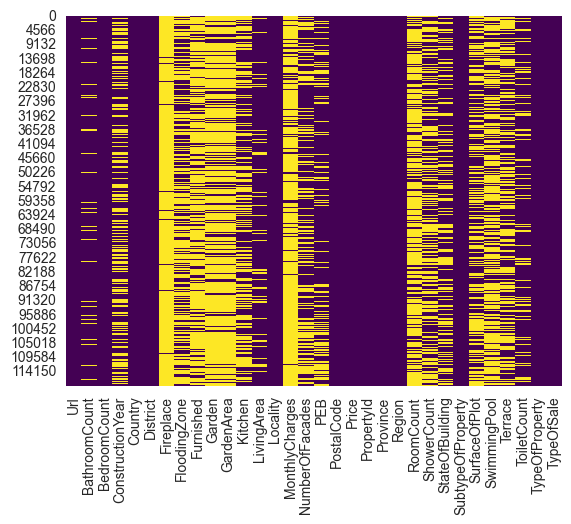

In [628]:
# Visualizing missing values in the dataset
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()


In [629]:
# Checking for percentage of missing values in each column.
round(df.isnull().sum() * 100 / len(df), 1)

Url                   0.0
BathroomCount         8.1
BedroomCount          0.0
ConstructionYear     42.0
Country               0.0
District              0.0
Fireplace            96.5
FloodingZone         50.9
Furnished            74.5
Garden               81.0
GardenArea           81.0
Kitchen              43.4
LivingArea           11.9
Locality              0.0
MonthlyCharges       88.5
NumberOfFacades      35.2
PEB                  28.3
PostalCode            0.0
Price                 0.0
PropertyId            0.0
Province              0.0
Region                0.0
RoomCount            72.3
ShowerCount          51.9
StateOfBuilding      31.2
SubtypeOfProperty     0.0
SurfaceOfPlot        50.9
SwimmingPool         66.0
Terrace              42.4
ToiletCount          18.8
TypeOfProperty        0.0
TypeOfSale            0.0
dtype: float64

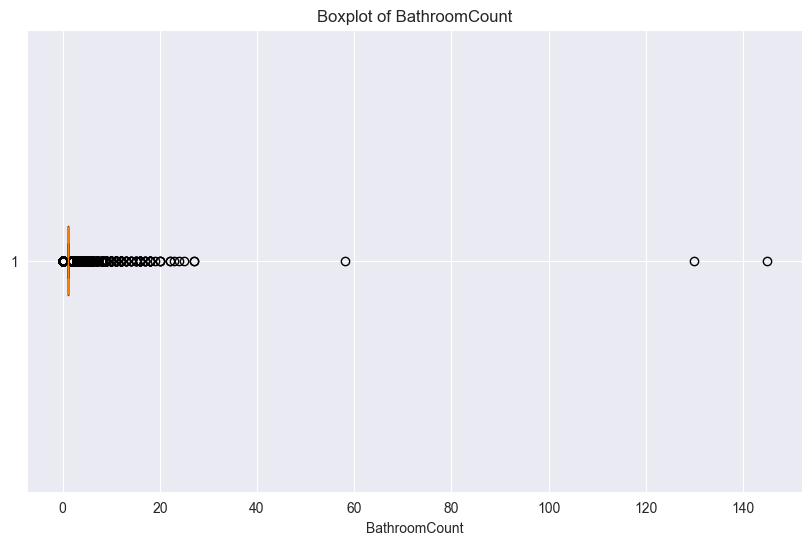

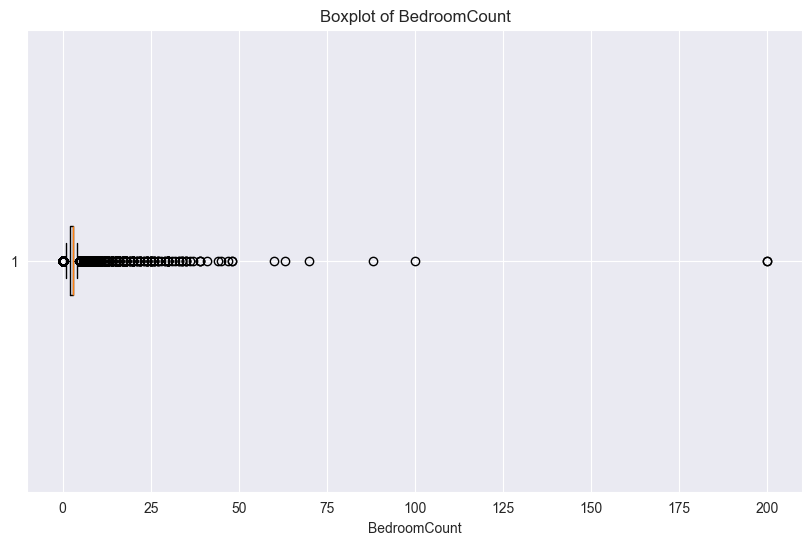

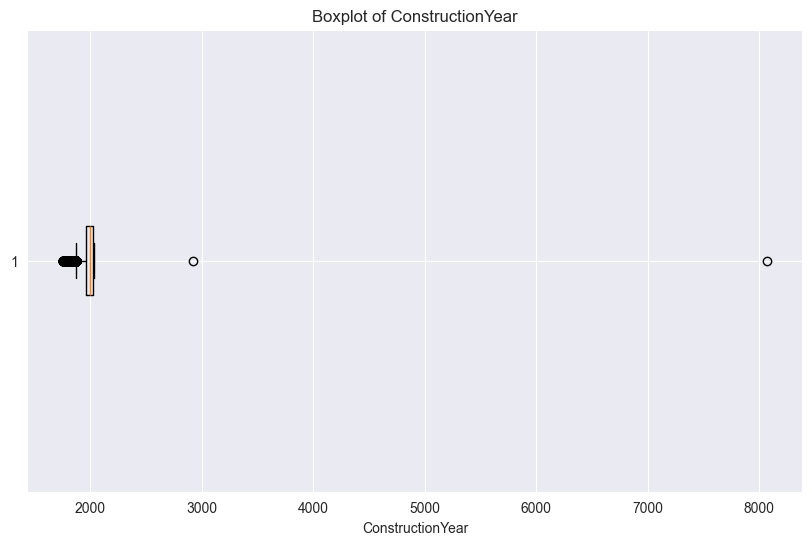

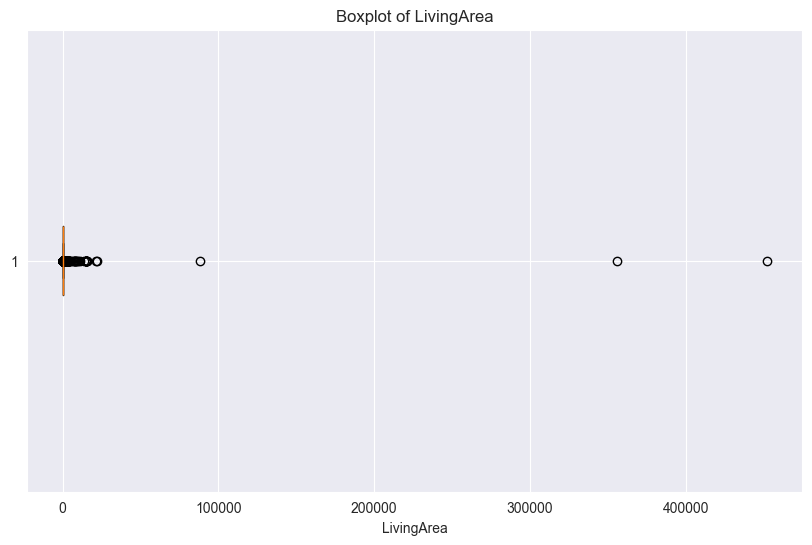

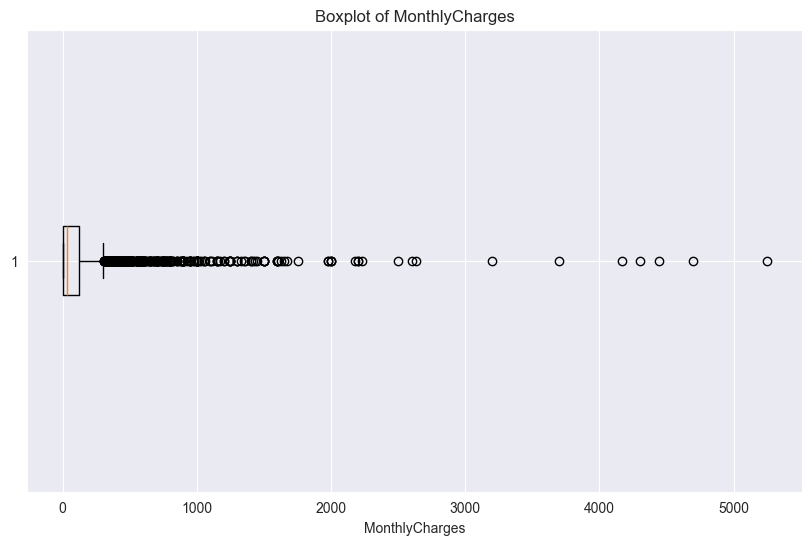

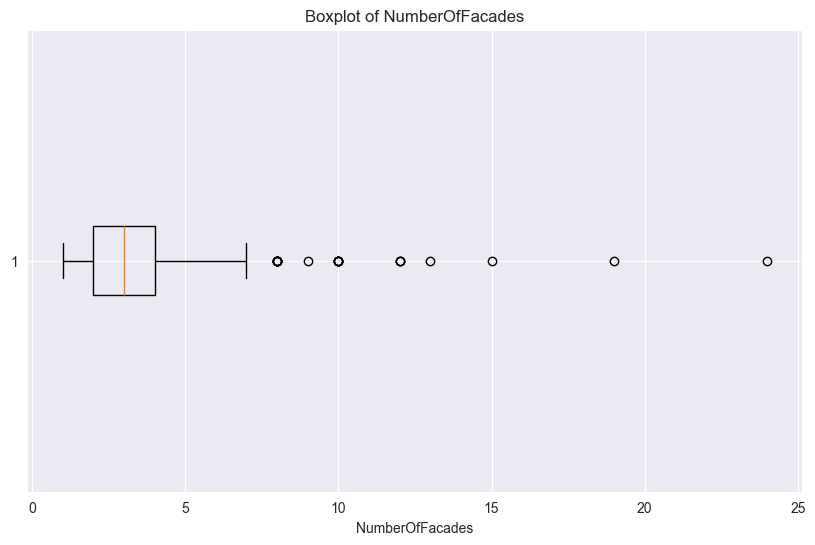

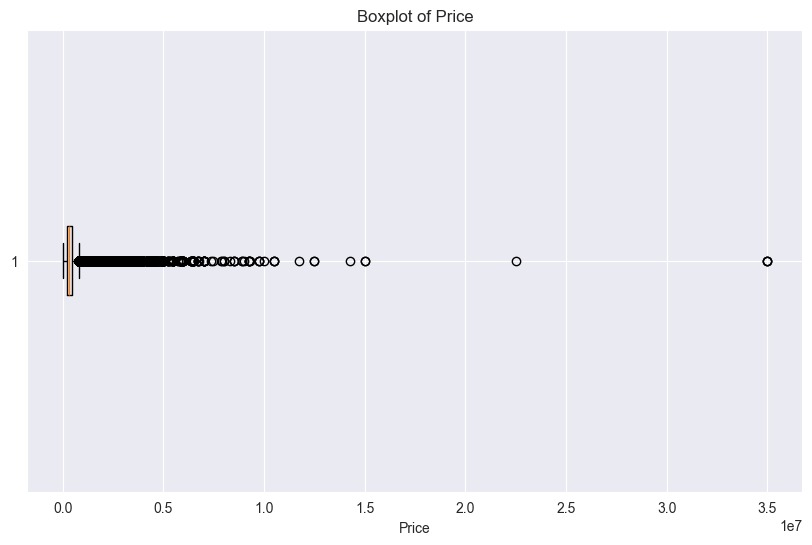

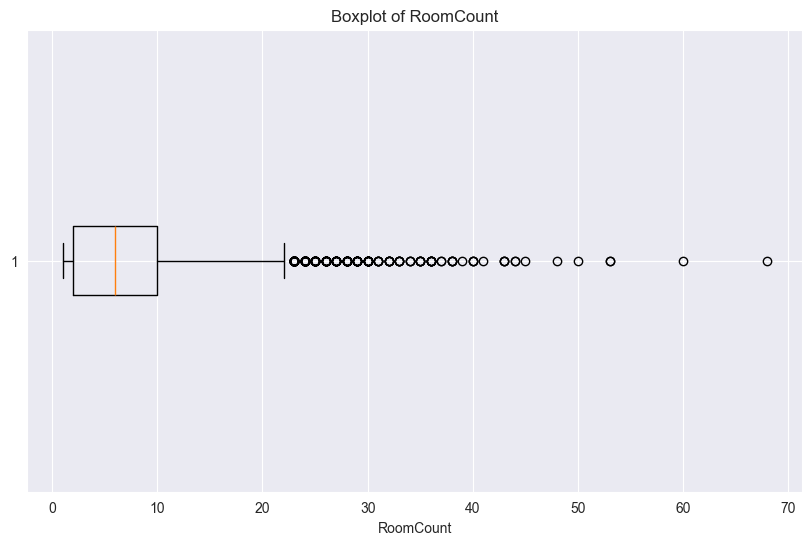

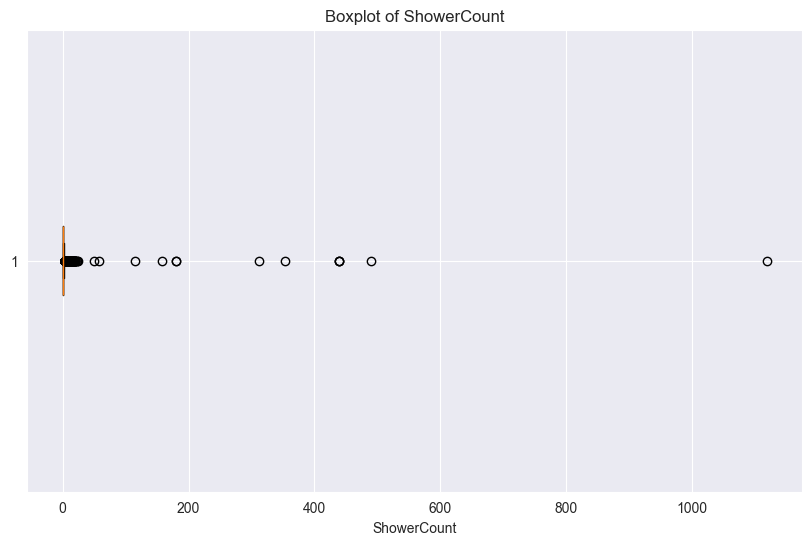

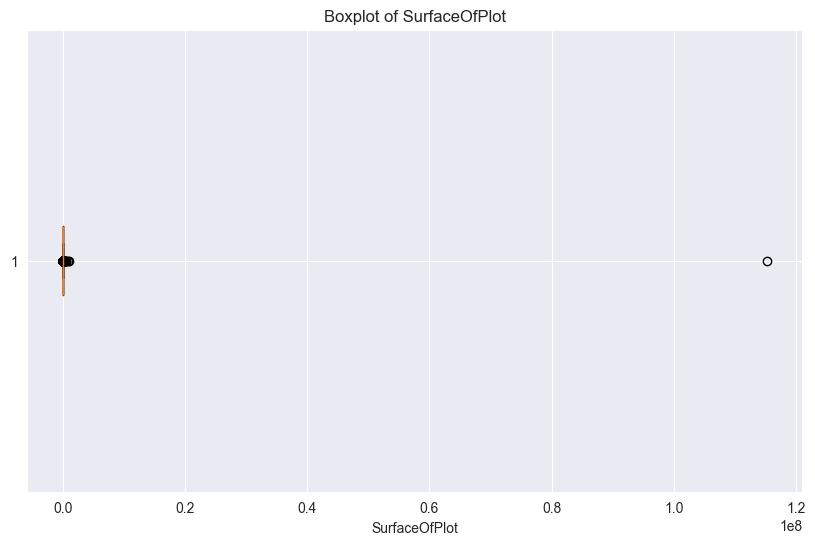

In [630]:
# Function that plots boxplots for numeric variables to see the outliers.
def boxplot_selected_columns(df, columns):
    for column in columns:
        if column in df.columns and pd.api.types.is_numeric_dtype(df[column]):
            plt.figure(figsize=(14, 6))
            plt.boxplot(df[column].dropna(), vert=False)
            plt.title(f'Boxplot of {column}')
            plt.xlabel(column)
            plt.show()
        else:
            print(f"Column {column} is not in the DataFrame or is not numeric.")


# List of columns to plot
selected_columns = [
    'BathroomCount', 'BedroomCount', 'ConstructionYear', 
    'LivingArea', 'MonthlyCharges', 'NumberOfFacades', 
    'Price', 'RoomCount', 'ShowerCount', 'SurfaceOfPlot'
]

boxplot_numeric_columns(df[selected_columns])

In [631]:
# Checking for duplicates
df['PropertyId'].duplicated().sum()

0

In [632]:
# Checking for blank spaces
def df_split(x: list):
    for i in x:
        if df[i].dtype == object:
            df[i] = df[i].str.strip().head()
            

In [633]:
# Extracting column names
columns_names = df.columns.tolist()

In [634]:
# Taking out blank spaces using df_split function
df_split(columns_names)


In [635]:
# Selecting list of columns names that are not object
none_object = df.select_dtypes(exclude=['object']).columns.tolist()
none_object

['BathroomCount',
 'BedroomCount',
 'ConstructionYear',
 'Fireplace',
 'Furnished',
 'Garden',
 'GardenArea',
 'LivingArea',
 'MonthlyCharges',
 'NumberOfFacades',
 'PostalCode',
 'Price',
 'PropertyId',
 'RoomCount',
 'ShowerCount',
 'SurfaceOfPlot',
 'SwimmingPool',
 'Terrace',
 'ToiletCount',
 'TypeOfProperty']

In [636]:
# Selecting list of columns names that are objects
object = df.select_dtypes(include=['object']).columns.tolist()
object

['Url',
 'Country',
 'District',
 'FloodingZone',
 'Kitchen',
 'Locality',
 'PEB',
 'Province',
 'Region',
 'StateOfBuilding',
 'SubtypeOfProperty',
 'TypeOfSale']

In [637]:
# Change all missing values where objects we inserted False, where int and float we inserted 0.
for i in none_object:
    df[i] = df[i].fillna(0)
for i in object:
    df[i] = df[i].fillna(False)


In [638]:
# Checking for percentage of missing values in each column.
round(df.isnull().sum() * 100 / len(df), 1)

Url                  0.0
BathroomCount        0.0
BedroomCount         0.0
ConstructionYear     0.0
Country              0.0
District             0.0
Fireplace            0.0
FloodingZone         0.0
Furnished            0.0
Garden               0.0
GardenArea           0.0
Kitchen              0.0
LivingArea           0.0
Locality             0.0
MonthlyCharges       0.0
NumberOfFacades      0.0
PEB                  0.0
PostalCode           0.0
Price                0.0
PropertyId           0.0
Province             0.0
Region               0.0
RoomCount            0.0
ShowerCount          0.0
StateOfBuilding      0.0
SubtypeOfProperty    0.0
SurfaceOfPlot        0.0
SwimmingPool         0.0
Terrace              0.0
ToiletCount          0.0
TypeOfProperty       0.0
TypeOfSale           0.0
dtype: float64

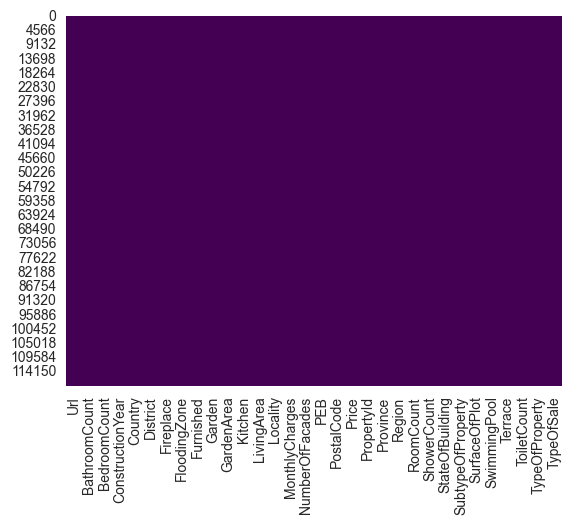

In [639]:
# Visualizing missing values in the dataset
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

<Axes: >

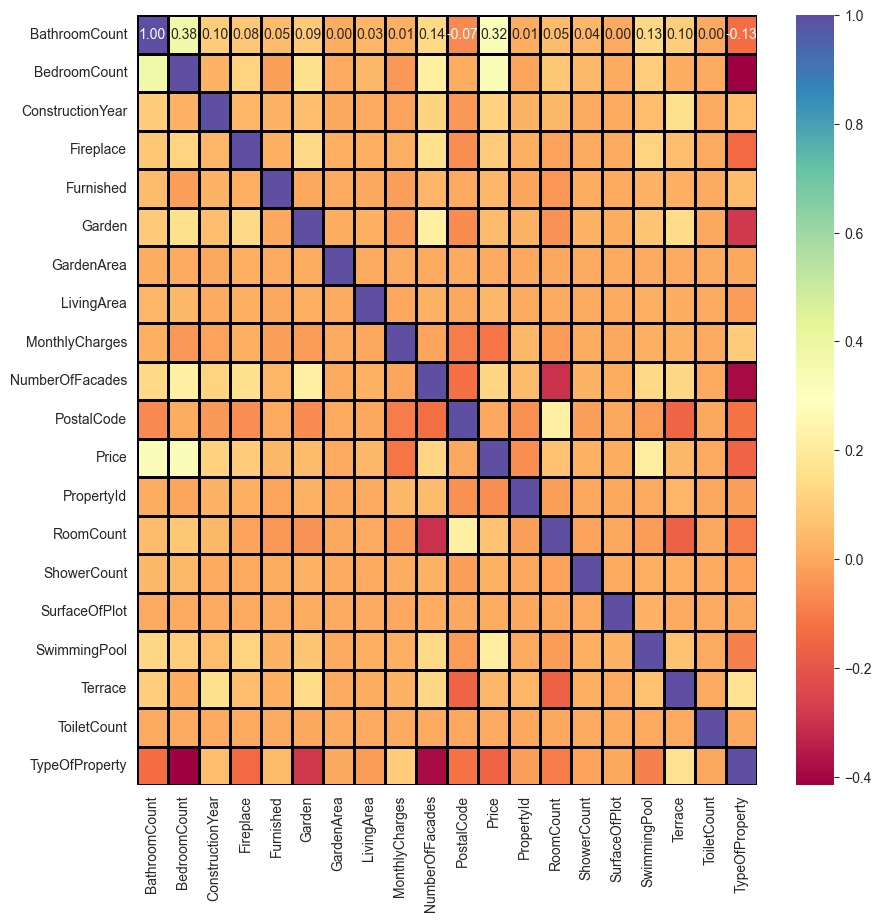

In [640]:
# Creating the copy of dataframe, consisting only of int64 and float values
df_copy = df.copy()
df_copy = df_copy.select_dtypes(exclude=['object'])

# Visualizing correlations between numeric values
plt.figure(figsize = (10, 10)) 
sns.heatmap(df_copy.corr(), annot = True, cmap = "Spectral", linewidths = 2, linecolor = "#000000", fmt='.2f')


In [641]:
df.describe()

,BathroomCount,BedroomCount,ConstructionYear,Fireplace,Furnished,Garden,GardenArea,LivingArea,MonthlyCharges,NumberOfFacades,PostalCode,Price,PropertyId,RoomCount,ShowerCount,SurfaceOfPlot,SwimmingPool,Terrace,ToiletCount,TypeOfProperty
count,118714.000000,118714.000000,118714.000000,118714.000000,118714.000000,118714.000000,1.187140e+05,118714.000000,118714.000000,118714.000000,118714.000000,1.187140e+05,1.187140e+05,118714.000000,118714.000000,1.187140e+05,118714.000000,118714.000000,1.187140e+05,118714.000000
mean,1.133177,2.708383,1153.394966,0.034731,0.017892,0.189556,8.548918e+03,147.408511,9.686086,1.809290,5166.113129,3.815797e+05,1.245875e+07,1.887258,0.335015,1.529708e+03,0.017336,0.575703,3.347575e+01,1.509460
std,1.099593,1.855343,981.418131,0.183097,0.132559,0.391952,2.902346e+06,1703.678787,66.566676,1.506964,3060.657713,4.754330e+05,3.131297e+06,4.188860,4.566404,3.345435e+05,0.130520,0.494238,1.112284e+04,0.499913
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.882546e+06,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,1.000000
25%,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,76.000000,0.000000,0.000000,2250.000000,2.000000e+05,1.114592e+07,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,1.000000
50%,1.000000,3.000000,1939.000000,0.000000,0.000000,0.000000,0.000000e+00,112.000000,0.000000,2.000000,4671.000000,3.095000e+05,1.138077e+07,0.000000,0.000000,0.000000e+00,0.000000,1.000000,1.000000e+00,2.000000
75%,1.000000,3.000000,2011.000000,0.000000,0.000000,0.000000,0.000000e+00,172.000000,0.000000,3.000000,8400.000000,4.390000e+05,1.146776e+07,1.000000,0.000000,3.440000e+02,0.000000,1.000000,2.000000e+00,2.000000
max,145.000000,200.000000,8071.000000,1.000000,1.000000,1.000000,1.000000e+09,452230.000000,5250.000000,24.000000,9992.000000,3.500000e+07,2.002586e+07,68.000000,1120.000000,1.152500e+08,1.000000,1.000000,3.832365e+06,2.000000


In [642]:
# Filtration of only numeric values.
df_numeric = df.select_dtypes(include=[np.number])

# Finding of Z-score.
z_scores = stats.zscore(df_numeric)

# Creation of mask for all rows that are higher or lower than 3 standard deviations.
mask = (abs(z_scores) <= 3).all(axis=1)

# Applying of mask to original dataframe, to get rid of outliers.
df_cleaned = df[mask]

df_cleaned.describe()

,BathroomCount,BedroomCount,ConstructionYear,Fireplace,Furnished,Garden,GardenArea,LivingArea,MonthlyCharges,NumberOfFacades,PostalCode,Price,PropertyId,RoomCount,ShowerCount,SurfaceOfPlot,SwimmingPool,Terrace,ToiletCount,TypeOfProperty
count,105179.000000,105179.000000,105179.000000,105179.0,105179.0,105179.000000,105179.000000,105179.000000,105179.000000,105179.000000,105179.000000,1.051790e+05,1.051790e+05,105179.000000,105179.000000,105179.000000,105179.0,105179.000000,105179.000000,105179.000000
mean,1.025975,2.534612,1136.082916,0.0,0.0,0.176337,75.282889,123.783037,5.547866,1.745168,5211.566282,3.284003e+05,1.245345e+07,1.542979,0.259310,362.794303,0.0,0.570142,1.085464,1.537227
std,0.660500,1.198218,985.144136,0.0,0.0,0.381109,903.631398,104.890977,25.664863,1.478441,3048.089958,2.341577e+05,3.132794e+06,3.361410,0.630109,2654.261717,0.0,0.495058,6.718649,0.498615
min,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,3.792317e+06,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
25%,1.000000,2.000000,0.000000,0.0,0.0,0.000000,0.000000,75.000000,0.000000,0.000000,2300.000000,1.990000e+05,1.113920e+07,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
50%,1.000000,2.000000,1937.000000,0.0,0.0,0.000000,0.000000,107.000000,0.000000,2.000000,4731.000000,2.990000e+05,1.137908e+07,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,2.000000
75%,1.000000,3.000000,2015.000000,0.0,0.0,0.000000,0.000000,160.000000,0.000000,3.000000,8420.000000,4.102130e+05,1.146773e+07,1.000000,0.000000,280.000000,0.0,1.000000,2.000000,2.000000
max,4.000000,8.000000,2924.000000,0.0,0.0,1.000000,143000.000000,4150.000000,205.000000,6.000000,9992.000000,1.800000e+06,2.002586e+07,14.000000,14.000000,366356.000000,0.0,1.000000,2147.000000,2.000000


In [643]:
# Filtering all the property prices less than 50,000 euros.
df_cleaned = df_cleaned[df_cleaned['Price'] >= 50000]

In [644]:
# Taking out outliers in Construction year (range 1900 - 2033)
df_cleaned = df_cleaned[(df_cleaned['ConstructionYear'] >= 1900) & (df_cleaned['ConstructionYear'] <= 2033)]

df_cleaned.shape

(53439, 32)

In [645]:
df_cleaned.describe()

,BathroomCount,BedroomCount,ConstructionYear,Fireplace,Furnished,Garden,GardenArea,LivingArea,MonthlyCharges,NumberOfFacades,PostalCode,Price,PropertyId,RoomCount,ShowerCount,SurfaceOfPlot,SwimmingPool,Terrace,ToiletCount,TypeOfProperty
count,53439.000000,53439.000000,53439.000000,53439.0,53439.0,53439.000000,53439.000000,53439.000000,53439.000000,53439.000000,53439.000000,5.343900e+04,5.343900e+04,53439.000000,53439.000000,53439.000000,53439.0,53439.000000,53439.000000,53439.000000
mean,1.109845,2.593125,1993.147514,0.0,0.0,0.194652,81.121035,130.798555,0.000075,1.888190,5208.911993,3.918739e+05,1.240674e+07,1.739385,0.244709,375.060387,0.0,0.637755,1.147252,1.554726
std,0.615238,1.158258,34.356020,0.0,0.0,0.395936,817.583688,96.535386,0.008651,1.489279,3157.659065,2.246613e+05,3.063643e+06,3.621660,0.603565,2473.329739,0.0,0.480654,0.926732,0.497001
min,0.000000,0.000000,1900.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,5.500000e+04,5.075537e+06,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
25%,1.000000,2.000000,1967.000000,0.0,0.0,0.000000,0.000000,83.000000,0.000000,0.000000,2300.000000,2.580000e+05,1.115300e+07,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
50%,1.000000,3.000000,2008.000000,0.0,0.0,0.000000,0.000000,112.000000,0.000000,2.000000,4170.000000,3.390000e+05,1.137544e+07,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,2.000000
75%,1.000000,3.000000,2023.000000,0.0,0.0,0.000000,0.000000,166.000000,0.000000,3.000000,8530.000000,4.490000e+05,1.146433e+07,1.000000,0.000000,321.000000,0.0,1.000000,2.000000,2.000000
max,4.000000,8.000000,2033.000000,0.0,0.0,1.000000,120000.000000,3100.000000,1.000000,6.000000,9992.000000,1.800000e+06,2.002586e+07,14.000000,14.000000,300000.000000,0.0,1.000000,21.000000,2.000000


In [646]:
# Taking out outliers (higher than 4000)
df_cleaned = df_cleaned[df_cleaned['SurfaceOfPlot'] <= 4000]


In [647]:
df_cleaned['SurfaceOfPlot'].value_counts(ascending=False)

SurfaceOfPlot
0.0       31739
500.0       118
200.0       116
300.0       109
140.0        98
          ...  
1514.0        1
1421.0        1
9.0           1
2131.0        1
2124.0        1
Name: count, Length: 2465, dtype: int64

In [648]:
# New shape of df_cleaned.
df_cleaned.shape

(52871, 32)

In [649]:
# Taking out outliers (everything higher than 9 and lower than 1000)
df_cleaned = df_cleaned[(df_cleaned['LivingArea'] >= 9) & (df_cleaned['LivingArea'] <= 1000)]

In [650]:
df_cleaned['LivingArea'].value_counts(ascending=False)

LivingArea
90.0     851
100.0    832
85.0     718
110.0    694
95.0     645
        ... 
512.0      1
817.0      1
486.0      1
982.0      1
447.0      1
Name: count, Length: 624, dtype: int64

In [651]:
# New shape of df_cleaned.
df_cleaned.shape

(48575, 32)

In [652]:
# Taking out monthly charges columns since 99.99% of this columns is the same value.
df_cleaned = df_cleaned.drop(columns=['MonthlyCharges'])

In [653]:
# We don't need URL column.
df_cleaned = df_cleaned.drop(columns=['Url'])

In [654]:
# We only have 1 value here, and its Belgium.
df_cleaned = df_cleaned.drop(columns=['Country'])

In [655]:
# We only needed property id to find duplicates, now we dont need it.
df_cleaned = df_cleaned.drop(columns=['PropertyId'])

In [656]:
# New shape of df_cleaned.
df_cleaned.shape

(48575, 28)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

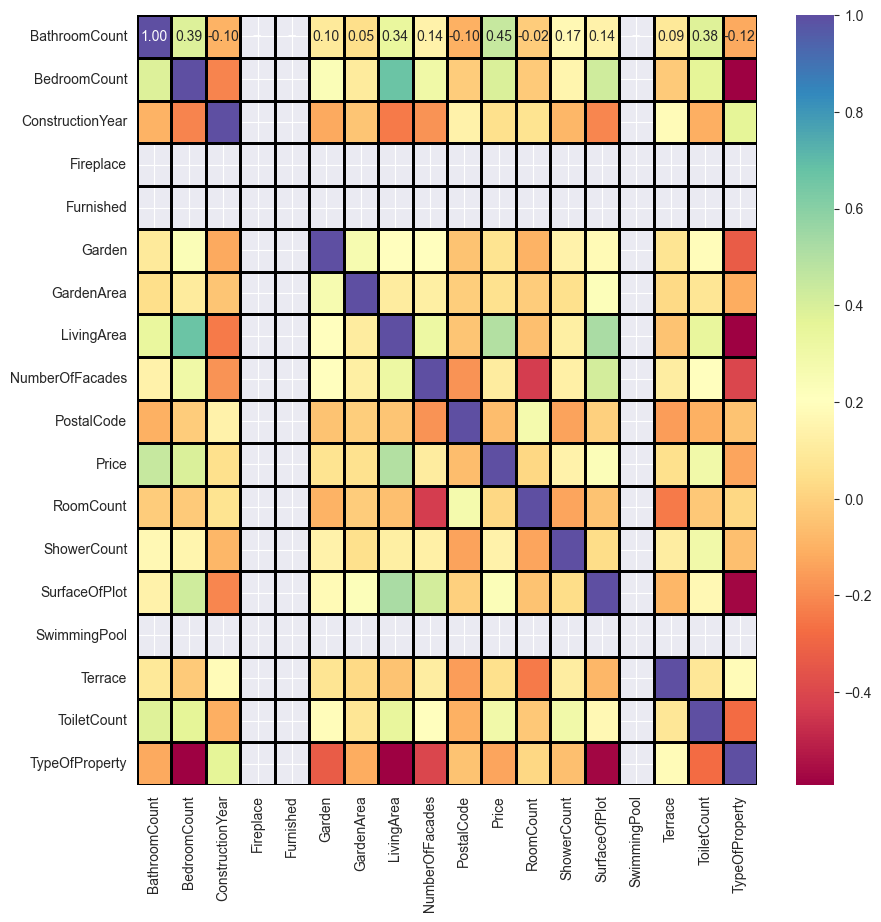

In [657]:
df_copy = df_cleaned.select_dtypes(exclude=['object'])

# Visualizing correlations between numeric values
plt.figure(figsize = (10, 10)) 
sns.heatmap(df_copy.corr(), annot = True, cmap = "Spectral", linewidths = 2, linecolor = "#000000", fmt='.2f')

In [658]:
df_copy.corr()

,BathroomCount,BedroomCount,ConstructionYear,Fireplace,Furnished,Garden,GardenArea,LivingArea,NumberOfFacades,PostalCode,Price,RoomCount,ShowerCount,SurfaceOfPlot,SwimmingPool,Terrace,ToiletCount,TypeOfProperty
BathroomCount,1.000000,0.385049,-0.096111,NaN,NaN,0.098007,0.046894,0.339534,0.138369,-0.102574,0.450254,-0.016319,0.171980,0.139127,NaN,0.087644,0.379290,-0.124898
BedroomCount,0.385049,1.000000,-0.218537,NaN,NaN,0.238831,0.101466,0.665210,0.301055,-0.015147,0.390987,-0.021182,0.148696,0.423794,NaN,-0.023070,0.361227,-0.591918
ConstructionYear,-0.096111,-0.218537,1.000000,NaN,NaN,-0.122324,-0.041347,-0.238128,-0.177236,0.138184,0.053656,0.063501,-0.084627,-0.209821,NaN,0.180254,-0.110017,0.362672
Fireplace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Furnished,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Garden,0.098007,0.238831,-0.122324,NaN,NaN,1.000000,0.263107,0.200780,0.199703,-0.044833,0.065142,-0.095353,0.136243,0.179110,NaN,0.073252,0.191021,-0.330498
GardenArea,0.046894,0.101466,-0.041347,NaN,NaN,0.263107,1.000000,0.106545,0.120001,-0.010938,0.055624,-0.016730,0.050336,0.226005,NaN,0.027548,0.073620,-0.118194
LivingArea,0.339534,0.665210,-0.238128,NaN,NaN,0.200780,0.106545,1.000000,0.316865,-0.042925,0.497325,-0.060049,0.121708,0.523785,NaN,-0.047714,0.342562,-0.587714
NumberOfFacades,0.138369,0.301055,-0.177236,NaN,NaN,0.199703,0.120001,0.316865,1.000000,-0.176362,0.109281,-0.431510,0.123475,0.411371,NaN,0.111964,0.200079,-0.401647
PostalCode,-0.102574,-0.015147,0.138184,NaN,NaN,-0.044833,-0.010938,-0.042925,-0.176362,1.000000,-0.064109,0.275860,-0.143371,-0.003245,NaN,-0.153069,-0.103519,-0.047088


Answer the following questions with a vizualization if appropriate:

- How many rows and columns?

The first shape of the dataframe was 118714, 32. After cleaning the data we got 48,575 data points and 30 columns. I cleaned columns Price, ConstructionYear, SurfacePlot, LivingArea. I dropped 2 columns: MonthlyCharges and URL. I used the statistics method of comparing Z-score to 3 standard deviations. I took every datapoint -3 or +3 standard deviations. 

- What is the correlation between the variables and the price? (Why might that be?)

We can see the correlation between BathroomCount and Price (+0.45). Also between BedroomCount and Price(+0.39). The strongest correlation is between LivingArea and Price (+0.49)


- How are variables correlated to each other? (Why?)

We can see the positive correlation between LivingArea and SurfaceOfPlot (+0.52) because larger is your living area the more surface plot you will get logically. We have negative correlation between TypeOfProperty and SurfaceOfPlot (-0.57), its because surface of your plot will depend on the type of property you have (appartment, house, etc..)


- Which variables have the greatest influence on the price?

LivingArea has the greatest influence on price.



- Which variables have the least influence on the price?

RoomCount has the least influence on the price with positive correlation of only +0.02.



- How many qualitative and quantitative variables are there? How would you transform these values into numerical values?

The DataFrame contains 12 columns of qualitative types and 20 columns with quantitative data types. By assigning a numerical value to each object value.



- Percentage of missing values per column?
8.1% of BathroomCount, 42% of ConstructionYear, 96.5% of Fireplace, 50.9% of FloodingZone, 74,5% of Furnished, 81% of Garden, 81% of GardenArea, 43.4% of Kitchen, 11.9% of LivingArea, 88.5% of MonthlyCharges, 35.2% of NumberOfFacades, 28.3% of PEB, 72.3% of RoomCount, 51.9% of ShowerCount, 31.2% of StateOfBuilding, 50.9% of SurfaceOfPlot, 66% of SwimmingPool, 42.4% of Terrace, 18.8% of ToiletCount.

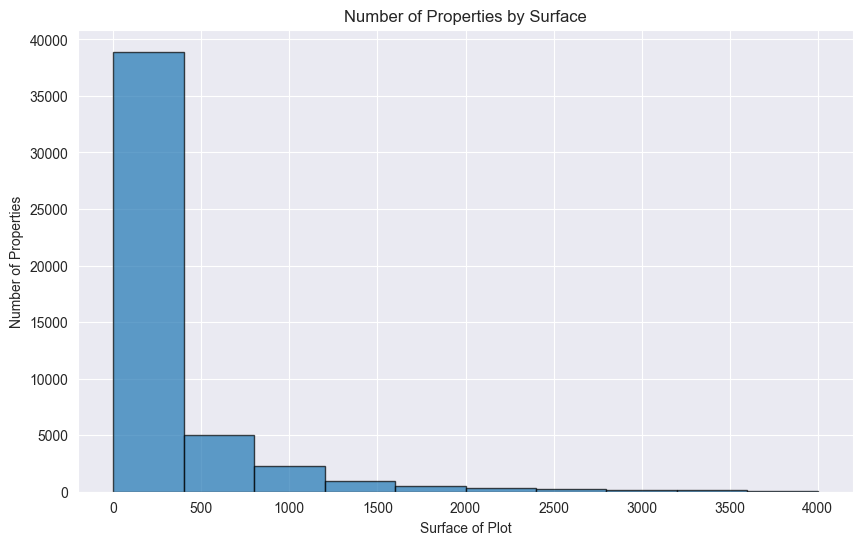

In [664]:
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['SurfaceOfPlot'], bins=10, edgecolor='k', alpha=0.7)
plt.title('Number of Properties by Surface')
plt.xlabel('Surface of Plot')
plt.ylabel('Number of Properties')
plt.grid(True)

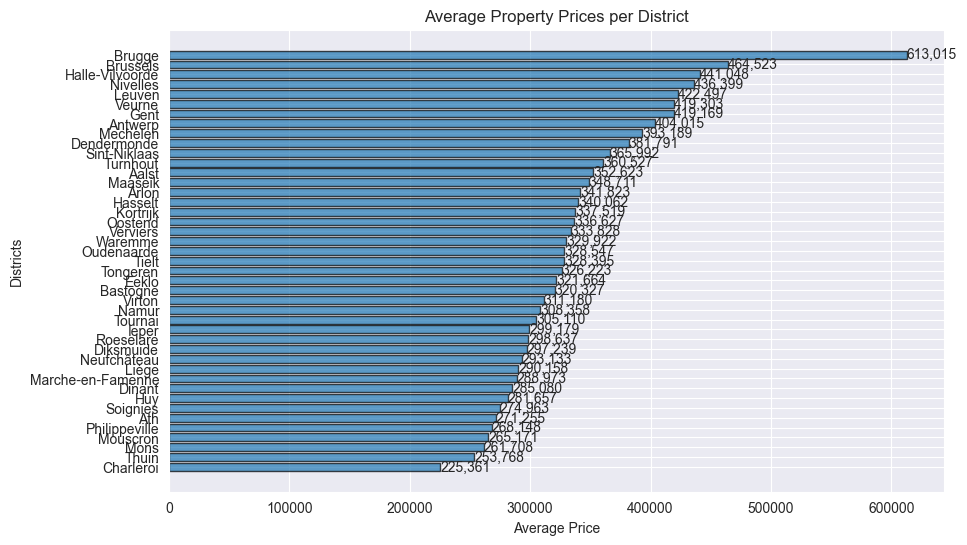

In [660]:
average_price_per_district = df_cleaned.groupby('District')['Price'].mean().sort_values()

# Plotting the histogram of the average prices per district
plt.figure(figsize=(10, 6))
bars = plt.barh(average_price_per_district.index, average_price_per_district, edgecolor='k', alpha=0.7)
plt.title('Average Property Prices per District')
plt.xlabel('Average Price')
plt.ylabel('Districts')
plt.grid(True)

# Adding the price values next to the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():,.0f}', va='center')

plt.show()

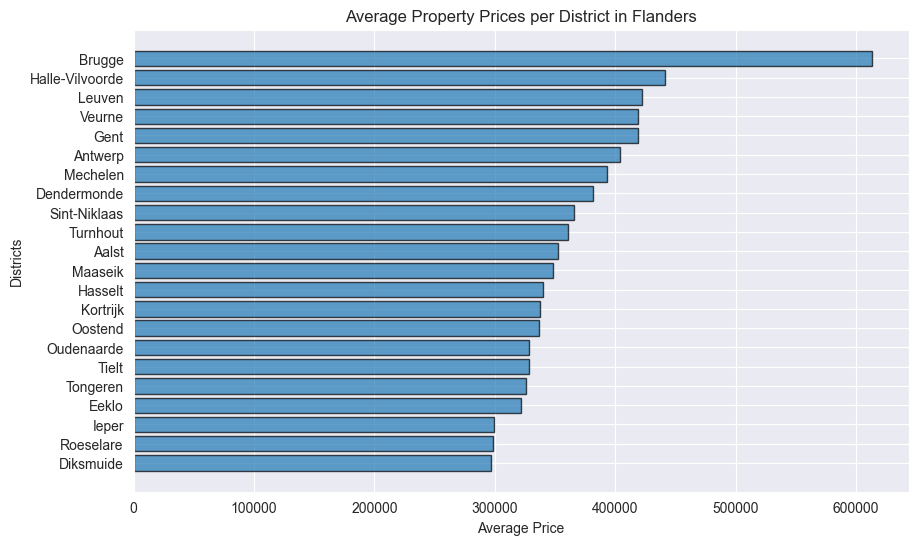

In [661]:
# Filtering for 'Region' == 'Flanders'
df_flanders = df_cleaned[df_cleaned['Region'] == 'Flanders']

average_price_per_district_flanders = df_flanders.groupby('District')['Price'].mean().sort_values()

plt.figure(figsize=(10, 6))
bars = plt.barh(average_price_per_district_flanders.index, average_price_per_district_flanders, edgecolor='k', alpha=0.7)
plt.title('Average Property Prices per District in Flanders')
plt.xlabel('Average Price')
plt.ylabel('Districts')
plt.grid(True)

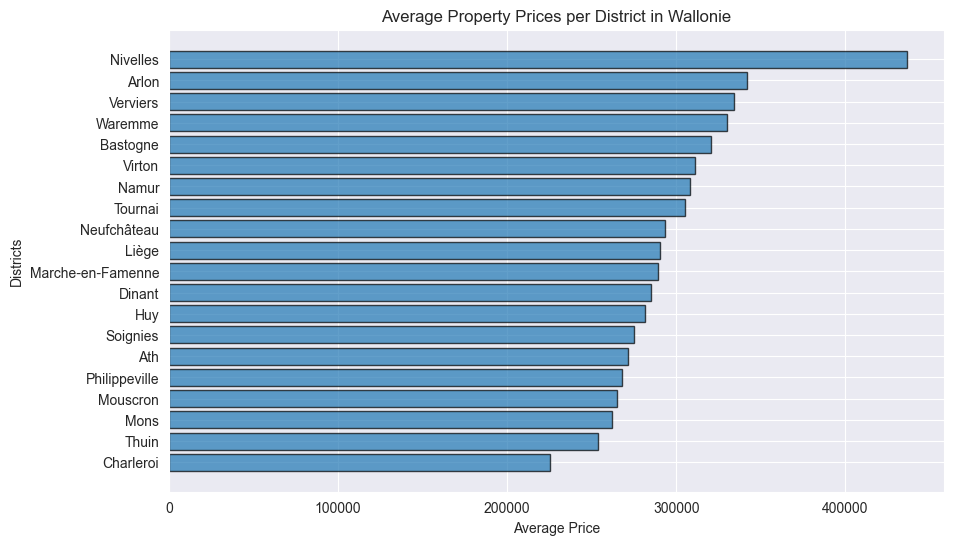

In [662]:
# Filter the DataFrame for 'Region' == 'Flanders'
df_flanders = df_cleaned[df_cleaned['Region'] == 'Wallonie']

average_price_per_district_flanders = df_flanders.groupby('District')['Price'].mean().sort_values()

plt.figure(figsize=(10, 6))
bars = plt.barh(average_price_per_district_flanders.index, average_price_per_district_flanders, edgecolor='k', alpha=0.7)
plt.title('Average Property Prices per District in Wallonie')
plt.xlabel('Average Price')
plt.ylabel('Districts')
plt.grid(True)

Plot the outliers.

Which variables would you delete and why ?
- I would remove the ‘MonthlyCharges’ column as it does not provide any additional information. Additionally, the ‘Url’ and ‘PropertyId’ columns should be deleted. We can also get rid of 'Country', since the only country in our dataset is Belgium.

Represent the number of properties according to their surface using a histogram.

In your opinion, which 5 variables are the most important and why?

- Price, LivingArea, SurfaceOfPlot,BathroomCount, BedroomCount. They are important according to corr plot and its influence on other variables.

What are the most expensive municipalities in Belgium? (Average price, median price, price per square meter)

- The most expensive municipalities in Belgium are Brugge and Brussels.

What are the most expensive municipalities in Wallonia? (Average price, median price, price per square meter)

- The most expensive municipalities in Wallonia are Nivelles and Arlon.

What are the most expensive municipalities in Flanders? (Average price, median price, price per square meter)

- The most expensive municipalities in Flanders are Brugge and Halle-Vilvoorde.

What are the less expensive municipalities in Belgium? (Average price, median price, price per square meter)

- The less expensive municipalities in Belgium are Thuin and Charleroi.

What are the less expensive municipalities in Wallonia? (Average price, median price, price per square meter)

- The less expensive municipalities in Wallonia are Thuin and Charleroi.

What are the less expensive municipalities in Flanders? (Average price, median price, price per square meter)

- The less expensive municipalities in Flanders are Roeselare and Diksmuide.